In [ ]:
from pandas.core import describe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [ ]:
rd = pd.read_excel('/content/CardiacData.xlsx') #RawData as rd

In [ ]:
#Top 10 Rows in Dataframe rd
rd.head(10)

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0
5,15,2,38,8,4.52,68,109,69,81.6,174.9,...,5.15,1.49,4.6,1,1,1,2,2,2,0
6,16,2,85,1,0.38,66,139,60,41.5,144.2,...,4.24,1.41,4.6,1,2,1,2,2,2,0
7,20,2,23,6,3.03,72,103,60,59.8,158.9,...,3.75,1.10,4.7,2,1,2,2,1,2,0
8,24,2,53,6,2.67,82,114,71,69.9,164.2,...,5.66,2.72,5.3,2,2,2,2,1,2,0
9,25,2,42,5,1.77,74,119,85,104.5,166.7,...,4.11,1.42,5.1,2,1,1,2,2,1,0


In [ ]:
rd.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [ ]:
rd['DiabetesType'] = rd['Diabetes']
rd['DiabetesType']

0        2
1        2
2        2
3        1
4        2
        ..
37074    2
37075    2
37076    2
37077    2
37078    2
Name: DiabetesType, Length: 37079, dtype: int64

In [ ]:
rd.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease',
       'DiabetesType'],
      dtype='object')

In [ ]:
rd['DiabetesType'] = rd['DiabetesType'].map({1: "Type-1", 2: "Type-2", 3: "Type-3"})
rd['DiabetesType']

0        Type-2
1        Type-2
2        Type-2
3        Type-1
4        Type-2
          ...  
37074    Type-2
37075    Type-2
37076    Type-2
37077    Type-2
37078    Type-2
Name: DiabetesType, Length: 37079, dtype: object

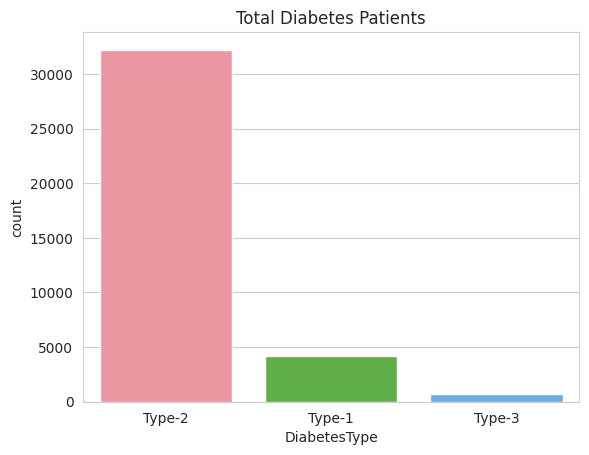

In [ ]:
sns.countplot(x='DiabetesType', data = rd)
plt.title('Total Diabetes Patients')
plt.show()

In [ ]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         37079 non-null  int64  
 1   Gender                       37079 non-null  int64  
 2   Age                          37079 non-null  int64  
 3   Annual-Family-Income         37079 non-null  int64  
 4   Ratio-Family-Income-Poverty  37079 non-null  float64
 5   X60-sec-pulse                37079 non-null  int64  
 6   Systolic                     37079 non-null  int64  
 7   Diastolic                    37079 non-null  int64  
 8   Weight                       37079 non-null  float64
 9   Height                       37079 non-null  float64
 10  Body-Mass-Index              37079 non-null  float64
 11  White-Blood-Cells            37079 non-null  float64
 12  Lymphocyte                   37079 non-null  float64
 13  Monocyte        

In [ ]:
#Selecting required Columns
rd1 = rd[['Gender','Age','Systolic','Diastolic','Weight','Height','Body-Mass-Index','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Red-Cell-Distribution-Width','ALP','AST','ALT','Cholesterol','Glucose','Total-Cholesterol','Glycohemoglobin','DiabetesType','Blood-Rel-Diabetes','Blood-Rel-Stroke','CoronaryHeartDisease']]

In [ ]:
rd1.head()

,Gender,Age,Systolic,Diastolic,Weight,Height,Body-Mass-Index,Mean-Cell-Vol,Mean-Cell-Hgb-Conc.,Red-Cell-Distribution-Width,...,AST,ALT,Cholesterol,Glucose,Total-Cholesterol,Glycohemoglobin,DiabetesType,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,1,77,98,56,75.4,174.0,24.90,88.5,29.7,13.7,...,19,16,5.25,4.330,5.56,4.7,Type-2,2,2,0
1,1,49,122,83,92.5,178.3,29.10,84.9,28.3,13.1,...,22,28,7.16,5.273,7.21,5.5,Type-2,2,2,0
2,1,37,174,99,99.2,180.0,30.62,83.5,27.8,13.6,...,17,35,3.90,4.163,4.03,5.2,Type-2,1,1,0
3,1,70,130,66,63.6,157.7,25.57,91.1,30.3,14.4,...,24,35,7.94,7.882,8.12,7.6,Type-1,1,2,0
4,1,81,136,61,75.5,166.2,27.33,90.4,31.3,12.4,...,23,18,4.42,6.384,4.50,5.8,Type-2,2,2,0


In [ ]:
rd1.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Height',
       'Body-Mass-Index', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Red-Cell-Distribution-Width', 'ALP', 'AST', 'ALT', 'Cholesterol',
       'Glucose', 'Total-Cholesterol', 'Glycohemoglobin', 'DiabetesType',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [ ]:
rd1.describe()

,Gender,Age,Systolic,Diastolic,Weight,Height,Body-Mass-Index,Mean-Cell-Vol,Mean-Cell-Hgb-Conc.,Red-Cell-Distribution-Width,ALP,AST,ALT,Cholesterol,Glucose,Total-Cholesterol,Glycohemoglobin,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,1.513282,48.943661,124.090078,69.919253,80.988276,167.389601,28.824588,89.534540,30.365387,13.082278,70.789611,25.722511,25.601850,5.077399,5.595013,5.081713,5.676496,1.549502,1.796165,0.040670
std,0.499830,18.010440,19.254741,13.575804,20.678734,10.122908,6.608982,5.745514,2.336812,1.304517,26.073559,19.695625,25.889693,1.079629,2.059786,1.072682,1.050223,0.497550,0.402853,0.197527
min,1.000000,20.000000,0.000000,0.000000,32.300000,129.700000,13.180000,50.800000,14.600000,9.700000,7.000000,7.000000,4.000000,0.155000,1.050000,1.530000,2.000000,1.000000,1.000000,0.000000
25%,1.000000,33.000000,111.000000,62.000000,66.500000,160.000000,24.220000,86.700000,29.300000,12.300000,55.000000,19.000000,16.000000,4.319000,4.718000,4.320000,5.200000,1.000000,2.000000,0.000000
50%,2.000000,48.000000,121.000000,70.000000,78.200000,167.100000,27.800000,89.900000,30.600000,12.800000,67.000000,23.000000,21.000000,4.991000,5.110000,5.020000,5.400000,2.000000,2.000000,0.000000
75%,2.000000,63.000000,134.000000,78.000000,92.100000,174.600000,32.100000,93.000000,31.700000,13.500000,82.000000,27.000000,28.000000,5.740000,5.662000,5.740000,5.800000,2.000000,2.000000,0.000000
max,2.000000,85.000000,270.000000,132.000000,371.000000,204.500000,130.210000,125.300000,60.800000,37.800000,729.000000,1672.000000,1997.000000,14.611000,34.250000,14.090000,18.800000,2.000000,2.000000,1.000000


In [ ]:
rd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       37079 non-null  int64  
 1   Age                          37079 non-null  int64  
 2   Systolic                     37079 non-null  int64  
 3   Diastolic                    37079 non-null  int64  
 4   Weight                       37079 non-null  float64
 5   Height                       37079 non-null  float64
 6   Body-Mass-Index              37079 non-null  float64
 7   Mean-Cell-Vol                37079 non-null  float64
 8   Mean-Cell-Hgb-Conc.          37079 non-null  float64
 9   Red-Cell-Distribution-Width  37079 non-null  float64
 10  ALP                          37079 non-null  int64  
 11  AST                          37079 non-null  int64  
 12  ALT                          37079 non-null  int64  
 13  Cholesterol     

Grouping the Columns - [Gender, Diabetes, Blood-Rel-Diabetes, Blood-Rel-Stroke, CoronaryHeartDisease] to create categorical variable

In [ ]:
rd1['Gender'].value_counts()

2    19032
1    18047
Name: Gender, dtype: int64

In [ ]:
rd1.columns

Index(['Gender', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Height',
       'Body-Mass-Index', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Red-Cell-Distribution-Width', 'ALP', 'AST', 'ALT', 'Cholesterol',
       'Glucose', 'Total-Cholesterol', 'Glycohemoglobin', 'DiabetesType',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

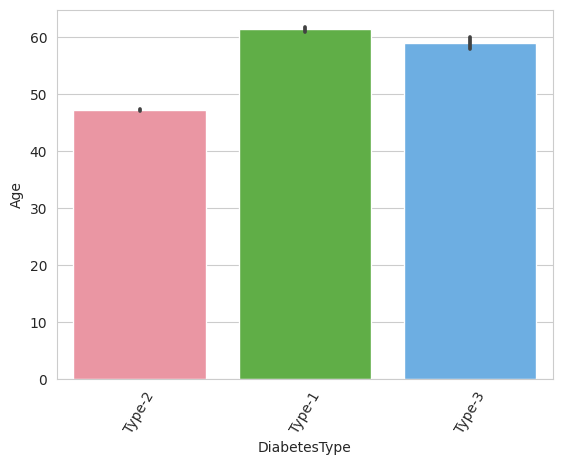

In [ ]:
sns.barplot(x='DiabetesType', y='Age', data = rd1)
plt.xticks(rotation = 60)
plt.show()

<Axes: xlabel='Age', ylabel='Red-Cell-Distribution-Width'>

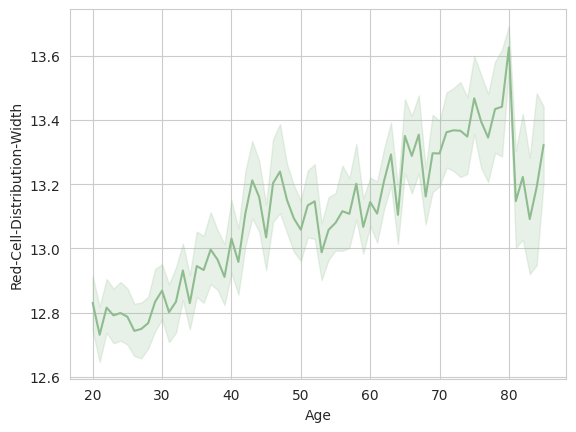

In [ ]:
sns.lineplot(x = 'Age', y = 'Red-Cell-Distribution-Width', data = rd1)

<Axes: xlabel='Age', ylabel='Total-Cholesterol'>

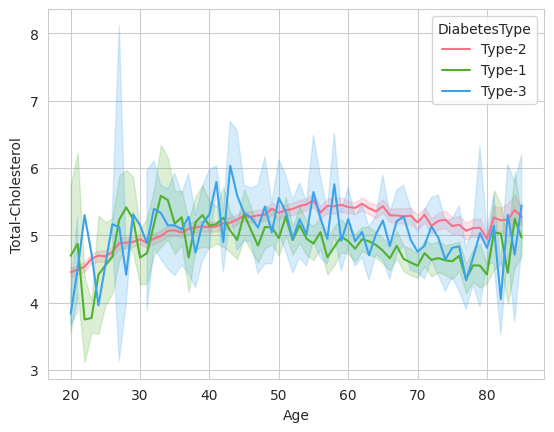

In [ ]:
sns.lineplot(x = 'Age', y = 'Total-Cholesterol', data = rd1, hue = 'DiabetesType')

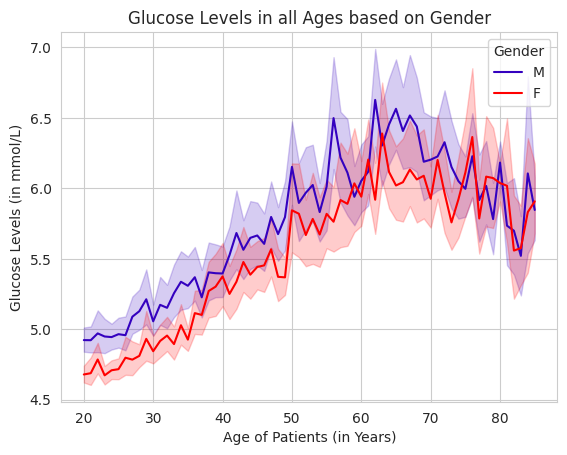

In [ ]:
plt.title('Glucose Levels in all Ages based on Gender')
custom_palette = ["#3401BF", "#FF0000"]
plt.xlabel("Age of Patients (in Years)")
plt.ylabel("Glucose Levels (in mmol/L)")
sns.set_palette(custom_palette)
sns.lineplot(x = 'Age', y = 'Glucose', data = rd1, hue = 'Gender')
plt.show()

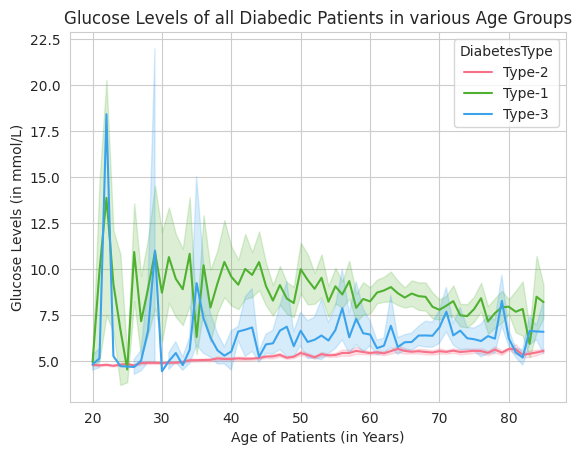

In [ ]:
plt.title('Glucose Levels of all Diabedic Patients in various Age Groups')
plt.xlabel("Age of Patients (in Years)")
plt.ylabel("Glucose Levels (in mmol/L)")
sns.lineplot(x = 'Age', hue = 'DiabetesType', y = 'Glucose', data = rd1)
plt.show()

Text(0, 0.5, 'Unit Quaity found in Blood (in mmol/L)')

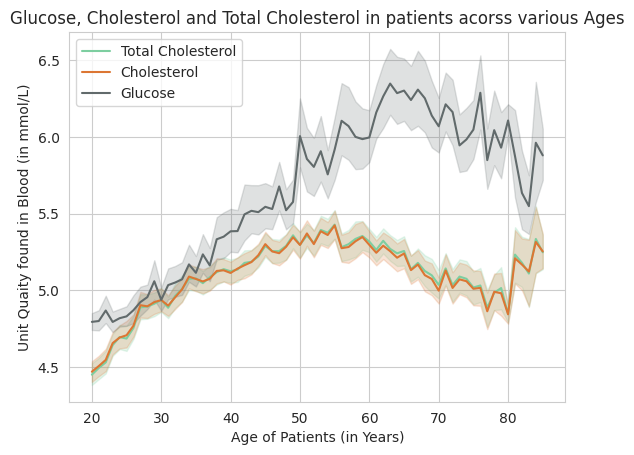

In [ ]:
sns.lineplot(data = rd1, x = 'Age', y = 'Total-Cholesterol', label = 'Total Cholesterol', color = '#7DCEA0')
sns.lineplot(data = rd1, x = 'Age', y = 'Cholesterol', label = 'Cholesterol', color = '#DC7633')
sns.lineplot(data = rd1, x = 'Age', y = 'Glucose', label = 'Glucose', color = '#616A6B')
plt.title("Glucose, Cholesterol and Total Cholesterol in patients acorss various Ages")
plt.xlabel("Age of Patients (in Years)")
plt.ylabel("Unit Quaity found in Blood (in mmol/L)")


<Axes: xlabel='Age', ylabel='Cholesterol'>

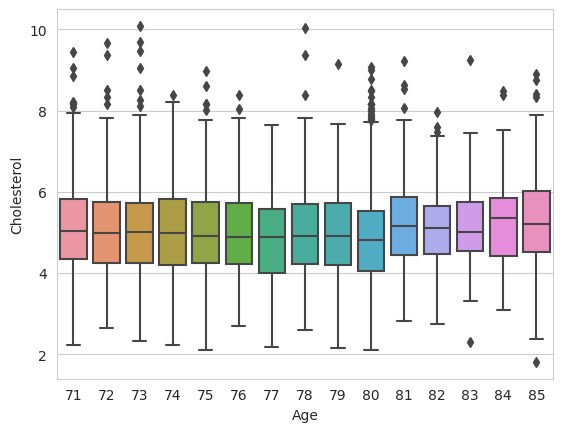

In [ ]:
#Less25 = rd1[rd1['Age']<25]
sns.boxplot(data = rd1[rd1['Age']>70], x = 'Age', y = 'Cholesterol')

<Axes: xlabel='DiabetesType', ylabel='Cholesterol'>

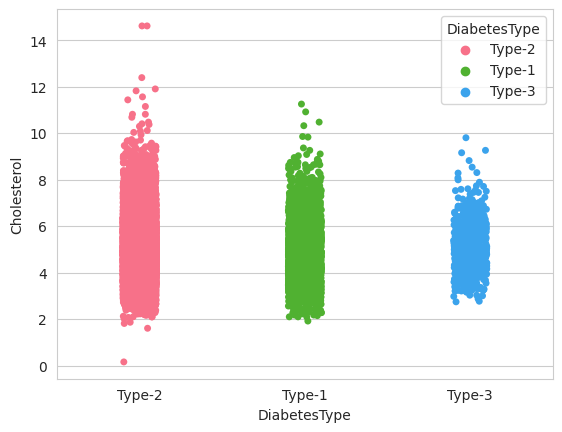

In [ ]:
sns.stripplot(x = 'DiabetesType', y = 'Cholesterol', data = rd1, jitter = True, hue = "DiabetesType")

Text(0.5, 1.0, 'Distribution of Age among the patients')

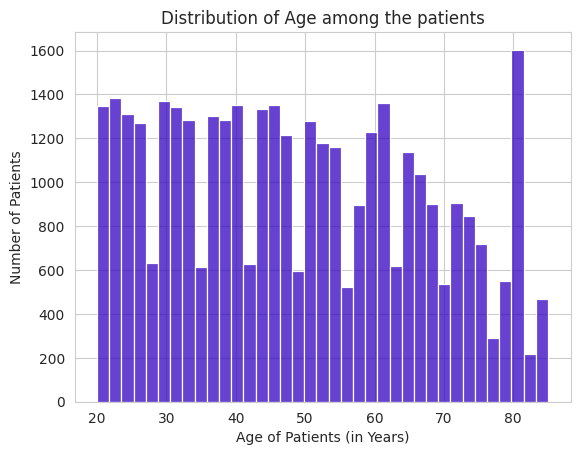

In [ ]:
#For Outliers
sns.histplot(data = rd1, x = 'Age')
plt.xlabel("Age of Patients (in Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age among the patients")

Min Val:  13.18 Max Val:  130.21 Average:  28.824587502359822 Median: 27.8 Mode: ModeResult(mode=23.9, count=126)


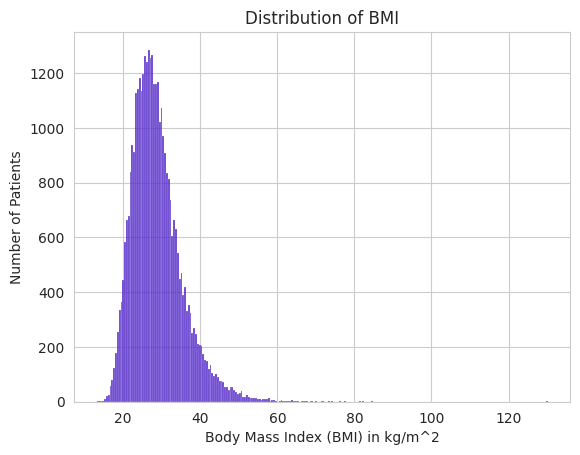

In [ ]:
sns.histplot(data = rd1, x = 'Body-Mass-Index')
plt.xlabel("Body Mass Index (BMI) in kg/m^2")
plt.ylabel("Number of Patients")
plt.title("Distribution of BMI")
print('Min Val: ', min(rd1['Body-Mass-Index']),
      'Max Val: ',max(rd1['Body-Mass-Index']),
      'Average: ',np.average(rd1['Body-Mass-Index']),
      'Median:',np.median(rd1['Body-Mass-Index']),
      'Mode:', st.mode(rd1['Body-Mass-Index']))

Min Val:  50.8 Max Val:  125.3 Average:  89.53453976644462 Median: 89.9 Mode: ModeResult(mode=89.4, count=469)


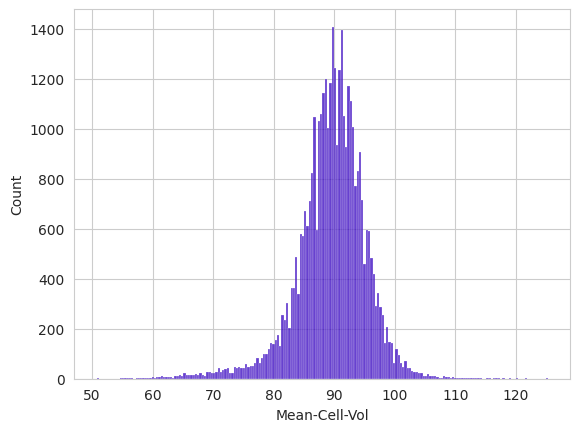

In [ ]:
sns.histplot(data = rd1, x = 'Mean-Cell-Vol')
print('Min Val: ', min(rd1['Mean-Cell-Vol']),
      'Max Val: ',max(rd1['Mean-Cell-Vol']),
      'Average: ',np.average(rd1['Mean-Cell-Vol']),
      'Median:',np.median(rd1['Mean-Cell-Vol']),
      'Mode:', st.mode(rd1['Mean-Cell-Vol']))

Min Val:  1.05 
Max Val:  34.25 
Average:  5.595012648669057 
Median: 5.11 
Mode: ModeResult(mode=4.94, count=1307)


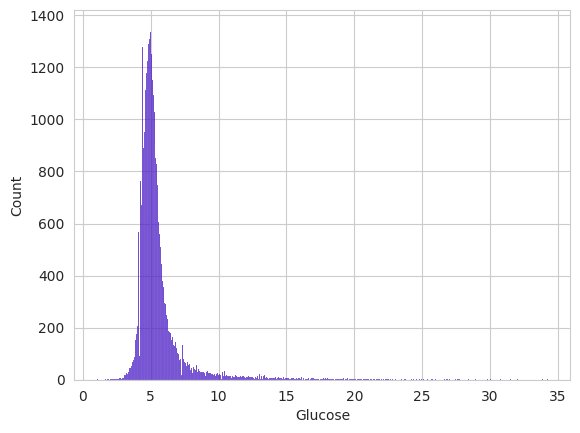

In [ ]:
sns.histplot(data = rd1, x = 'Glucose')
print('Min Val: ', min(rd1['Glucose']),
      '\nMax Val: ',max(rd1['Glucose']),
      '\nAverage: ',np.average(rd1['Glucose']),
      '\nMedian:',np.median(rd1['Glucose']),
      '\nMode:', st.mode(rd1['Glucose']))

Min Val:  0 
Max Val:  270 
Average:  124.09007794169206 
Median: 121.0 
Mode: ModeResult(mode=114, count=1805)


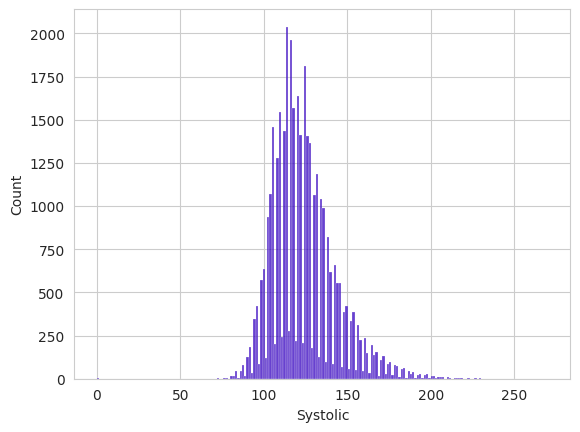

In [ ]:
sns.histplot(data = rd1, x = 'Systolic')
print('Min Val: ', min(rd1['Systolic']),
      '\nMax Val: ',max(rd1['Systolic']),
      '\nAverage: ',np.average(rd1['Systolic']),
      '\nMedian:',np.median(rd1['Systolic']),
      '\nMode:', st.mode(rd1['Systolic']))

Min Val:  0 
Max Val:  132 
Average:  69.91925348580058 
Median: 70.0 
Mode: ModeResult(mode=74, count=2266)


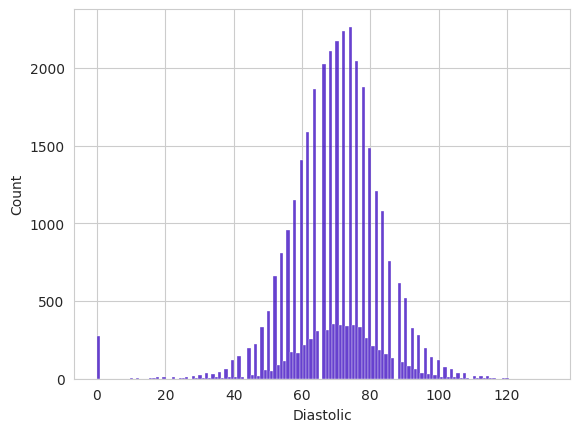

In [ ]:
sns.histplot(data = rd1, x = 'Diastolic')
print('Min Val: ', min(rd1['Diastolic']),
      '\nMax Val: ',max(rd1['Diastolic']),
      '\nAverage: ',np.average(rd1['Diastolic']),
      '\nMedian:',np.median(rd1['Diastolic']),
      '\nMode:', st.mode(rd1['Diastolic']))

Text(0.5, 1.0, 'Measure of Systolic and Diastolic Readings (for Blood Preasure)')

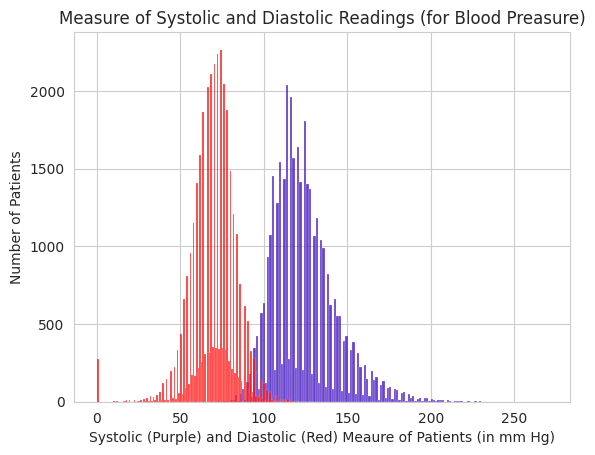

In [ ]:
#Histogram - BP
sns.histplot(data = rd1, x = 'Systolic', label = 'Systolic Measure')
sns.histplot(data = rd1, x = 'Diastolic', label = 'Diastolic Measure')
plt.xlabel("Systolic (Purple) and Diastolic (Red) Meaure of Patients (in mm Hg)")
plt.ylabel("Number of Patients")
plt.title("Measure of Systolic and Diastolic Readings (for Blood Preasure)")


Min Val:  1.53 Max Val:  14.09 Average:  5.081713368753202 Median: 5.01999999999999 Mode: ModeResult(mode=5.09, count=400)


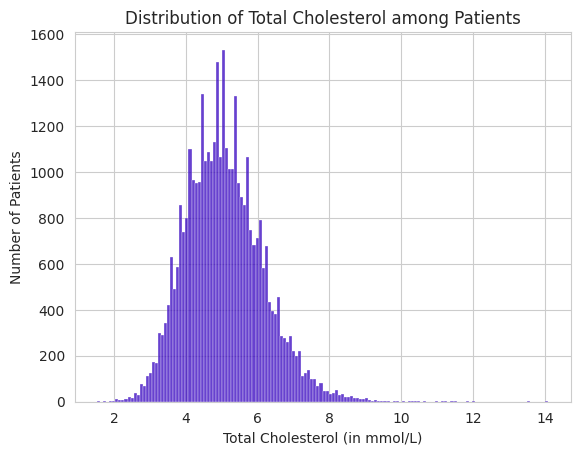

In [ ]:
sns.histplot(data = rd1, x = 'Total-Cholesterol')
plt.xlabel("Total Cholesterol (in mmol/L)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Total Cholesterol among Patients")
print('Min Val: ', min(rd1['Total-Cholesterol']),
      'Max Val: ',max(rd1['Total-Cholesterol']),
      'Average: ',np.average(rd1['Total-Cholesterol']),
      'Median:',np.median(rd1['Total-Cholesterol']),
      'Mode:', st.mode(rd1['Total-Cholesterol']))

Min Val:  2.0 Max Val:  18.8 Average:  5.676496129884838 Median: 5.4 Mode: ModeResult(mode=5.4, count=3488)


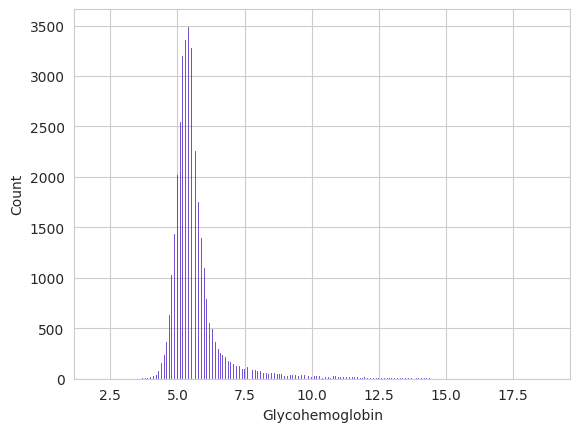

In [ ]:
sns.histplot(data = rd1, x = 'Glycohemoglobin')
print('Min Val: ', min(rd1['Glycohemoglobin']),
      'Max Val: ',max(rd1['Glycohemoglobin']),
      'Average: ',np.average(rd1['Glycohemoglobin']),
      'Median:',np.median(rd1['Glycohemoglobin']),
      'Mode:', st.mode(rd1['Glycohemoglobin']))

Text(0, 0.5, 'Measure of Glucose/Glycohemobin')

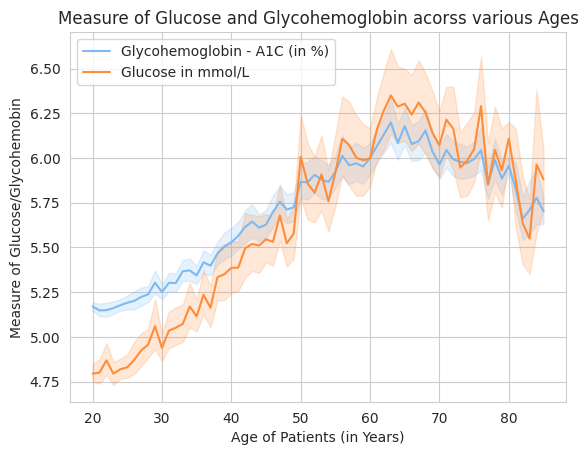

In [ ]:
#Line Graph – Glucose + Glycohemoglobin
sns.lineplot(x = 'Age', y = 'Glycohemoglobin', data  = rd1, label = 'Glycohemoglobin - A1C (in %)', color = '#7EB9F2')
sns.lineplot(x = 'Age', y = 'Glucose', data  = rd1, label = 'Glucose in mmol/L', color = '#FF8C38')
plt.legend(loc = "upper left")
plt.title("Measure of Glucose and Glycohemoglobin acorss various Ages")
plt.xlabel("Age of Patients (in Years)")
plt.ylabel("Measure of Glucose/Glycohemobin")

In [ ]:
rd1.describe()
rd1['Gender'].value_counts()
rd1['CoronaryHeartDisease'].value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

Text(0.5, 1.0, 'Measure of Glucose for Patients affected by Coronary Heart Disease')

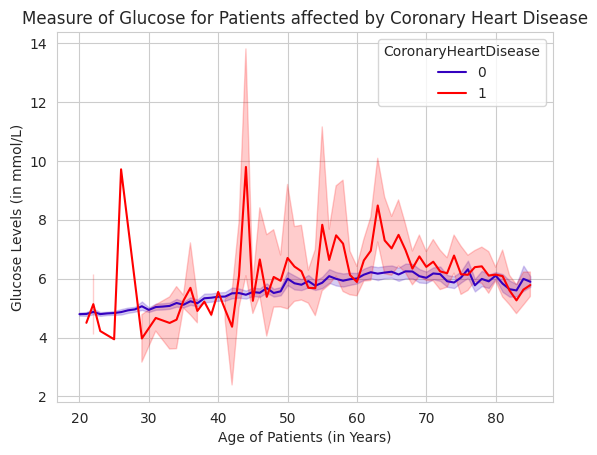

In [ ]:
#Main Line Graph – Glucose + CoronaryHeartDisease
sns.lineplot(x = 'Age', y = 'Glucose', data = rd1, hue = 'CoronaryHeartDisease')
plt.xlabel("Age of Patients (in Years)")
plt.ylabel("Glucose Levels (in mmol/L)")
plt.title("Measure of Glucose for Patients affected by Coronary Heart Disease")


In [ ]:
cor_mat = rd1.corr()

<ipython-input-242-7cf8923fee6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = rd1.corr()


<Axes: >

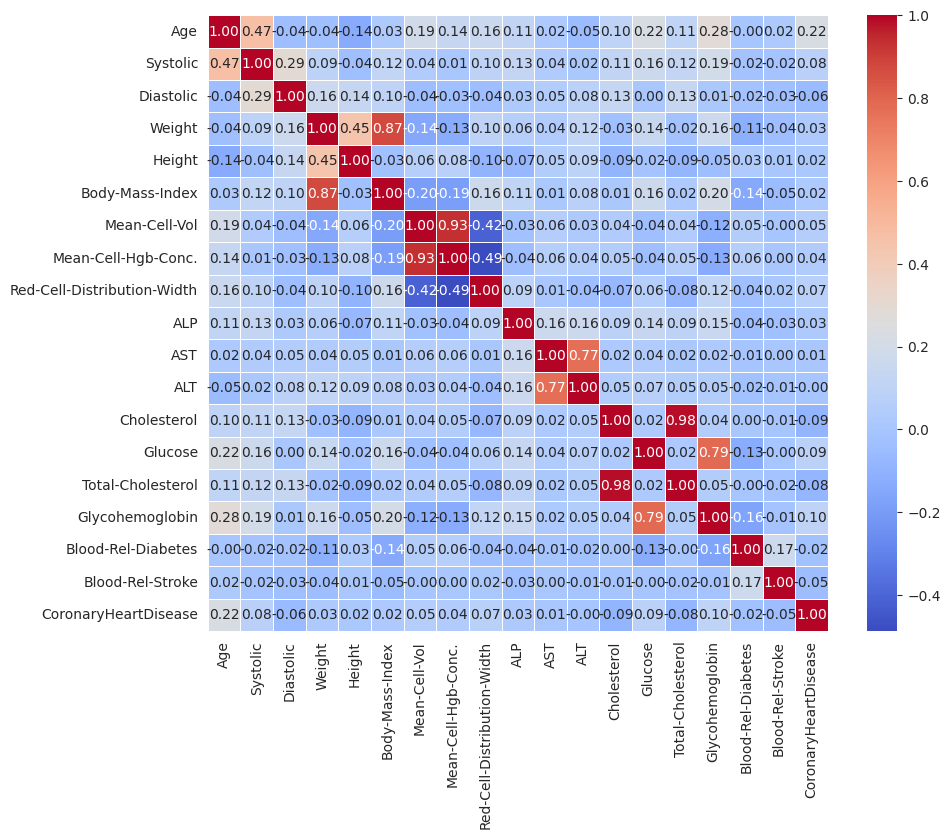

In [ ]:
#Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat,annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
